# DATA ANALYSIS AND MODELING FOR A TELECOMMUNICATIONS COMPANY TO BE ABLE TO TELL IF CUSTOMER WILL CHURN OR NOT

## OVERVIEW & DATA UNDERSTANDING

This analysis uses data sourced from Kaggle from a dataset named Churn in Telecom's dataset, a CSV file that provides comprehensive information on total day calls, total eve calls, customer service calls, total night calls, churn, total intl calls among other key performance factors to help the company make informed decisions on whether a customer will ("soon") stop doing business with
This project aims to analyze SyriaTel, a telecommunications company data to be able to tell if a customer will churn or not. This will help to identify at-risk customers and improve retention strategies. The company is interested in reducing how much money is lost because of customers who don't stick around very long. By looking at various factors like total day calls, total eve calls, customer service calls, churn etc I will guide the company on how to reduce the churn rate to reduce loss.

## DATA PREPARATION & CLEANING

In this section, I will be preprocessing the Churn in Telecom's dataset to ensure it's suitable for analysis. This involves importing the necessary libraries we'll use for our analysis, loading the data,  creating variables, and cleaning the data, among other steps. 

The prepared data will enable reliable analysis, gaining insights into building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset I am working with and checking the first 10 rows
df=pd.read_csv("churn.csv")
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
#Checking the last 5 rows of the dataset
df.tail(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
#Checking the summary statistics for the dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Printing information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Returning tuples representing the dimensionality of the data
df.shape

(3333, 21)

In [7]:
#Printing the columns in the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
# Checking for missing values in this df
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Our dataset doesn't have any missing values.

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

Our dataset doesn't have any duplicate values.

In [10]:
# Dropping irrelevant columns
df_cleaned = df.drop(columns=['phone number'])

I have dropped this column because it's unique to every person so it won't help the model detect patterns and It also doesn't give any meaningful information about customer behavior or churn likelihood.

In [11]:
# One-hot encoding for 'state'
df_cleaned = pd.get_dummies(df_cleaned, columns=['state'], drop_first=True)

# Encoding categorical variables in the 'international plan' and 'voice mail plan' columns
df_cleaned['international plan'] = df_cleaned['international plan'].map({'yes': 1, 'no': 0})
df_cleaned['voice mail plan'] = df_cleaned['voice mail plan'].map({'yes': 1, 'no': 0})
df_cleaned.head(4)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False


The purpose of encoding these columns is to convert the categorical variables into a numerical format that can be used in statistical models and machine learning algorithms, enabling better analysis and predictions.

In [12]:
# Checking the class distribution
class_distribution = df_cleaned['churn'].value_counts(normalize=True)
print(class_distribution)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


This code is used to check the distribution of classes in the churn column. This will help me identify potential issues, such as class imbalance, which could affect the performance of machine learning models. This means that about 85.51% of the customers in the dataset did not churn. This suggests that the majority of your customers are retained. And that about 14.49% of the customers in the dataset churned. This indicates a smaller segment of customers who left the service.

## DATA ANALYSIS

Here I will be analyzing and visualizing key variables and their distributions to understand their relationships. I will also be checking 
for correlations and checking if there are any outliers in the data.

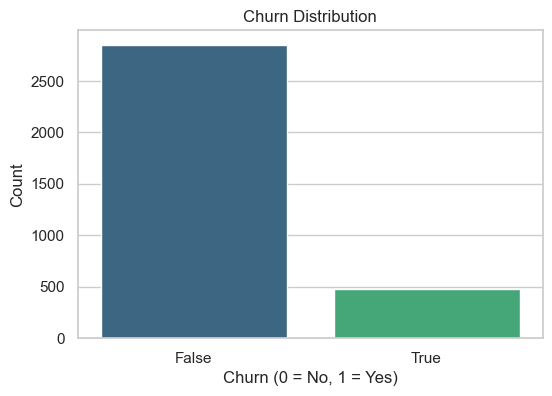

In [13]:
# Plotting the churn distribution of my data

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_cleaned, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The plot is a bar chart that visualizes the count of customers who have churned (True) versus those who have not churned (False). The bar representing customers who did not churn (False) is significantly taller, indicating that most customers have retained their service. The bar for customers who churned (True) is much shorter, showing that relatively few customers have left the service. This shows there is an imbalance between the classes.

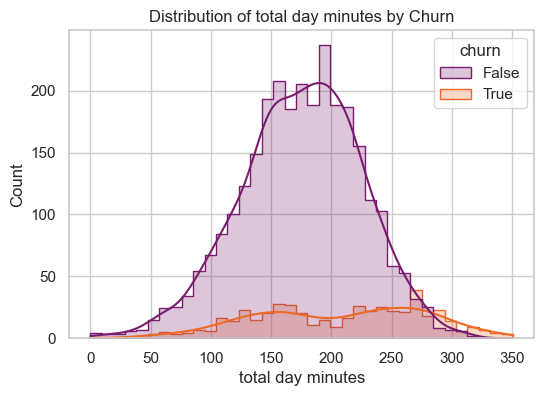

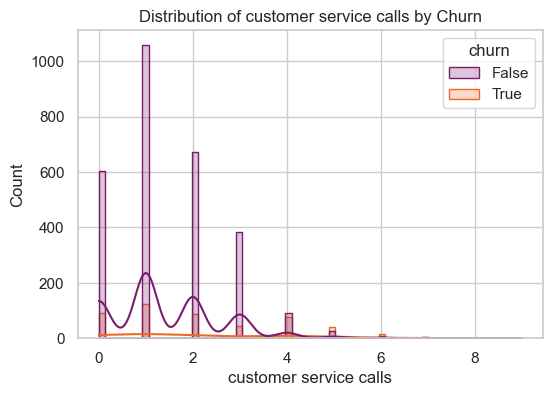

In [71]:
# Plotting distributions of the features
sns.set(style="whitegrid")

# List of the numerical features 
features = ['total day minutes', 'customer service calls']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_cleaned, x=feature, hue='churn', kde=True, palette='inferno', element='step')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The first Distribution indicates that churned customers tend to use fewer minutes overall.
The second Distribution indicates that customers who churned made fewer customer service calls overall, but some made multiple calls, indicating that customer service interactions might correlate with churn.

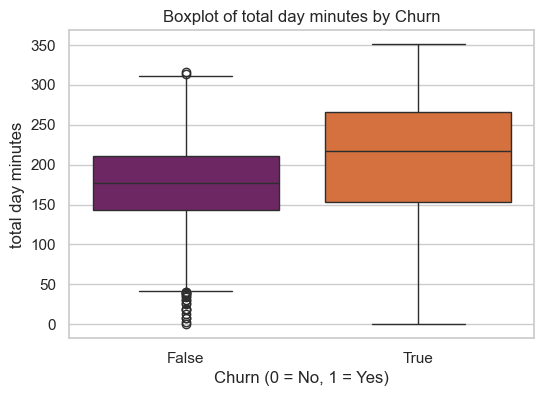

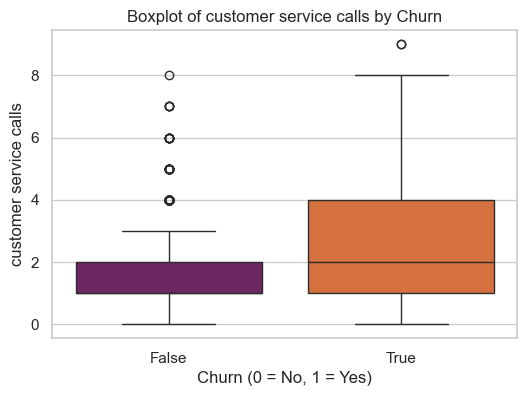

In [72]:
# Plotting Boxplots for the numerical features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_cleaned, x='churn', y=feature, palette='inferno')
    plt.title(f'Boxplot of {feature} by Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

The first Boxplot indicates that the lower average total day minutes for churned customers suggests that they are less engaged with the service.
The second Boxplot indicates that the higher frequency of customer service calls among churned customers indicates they may be experiencing issues that lead to dissatisfaction.

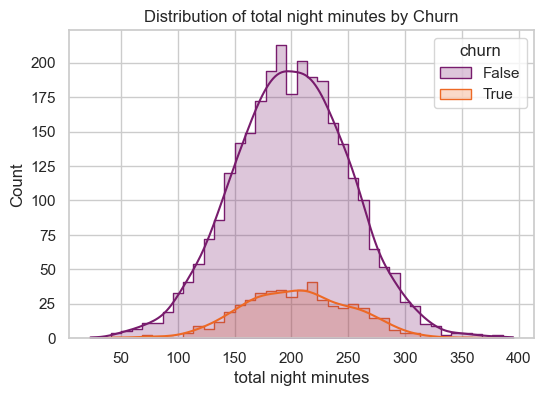

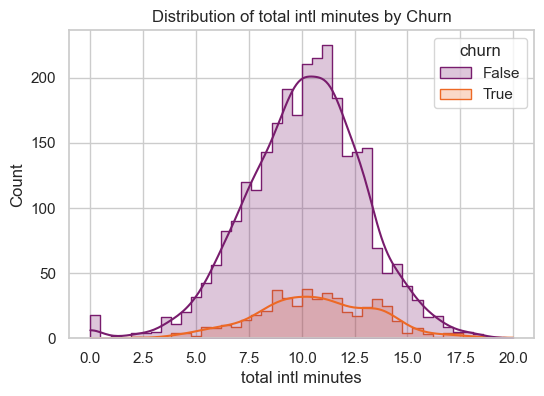

In [73]:
# Plotting distributions for other features

sns.set(style="whitegrid")

# List of other numerical features I want to explore
features = ['total night minutes', 'total intl minutes']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_cleaned, x=feature, hue='churn', kde=True, palette='inferno', element='step')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The first Distribution indicates that churned customers tend to use fewer night minutes.
The second Distribution indicates that churned customers use significantly fewer international minutes.

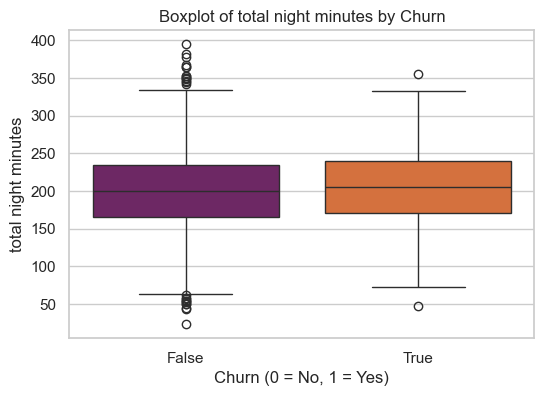

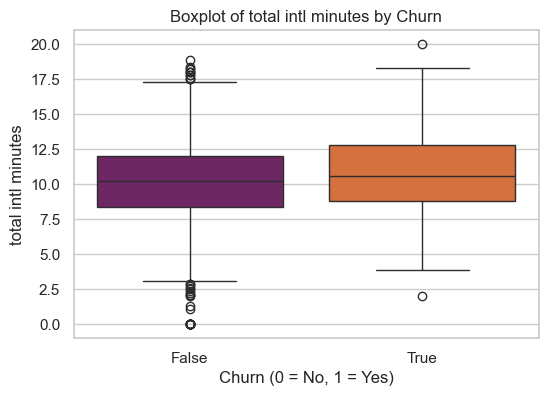

In [74]:
# Plotting Boxplots for the other numerical features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_cleaned, x='churn', y=feature, palette='inferno')
    plt.title(f'Boxplot of {feature} by Churn')
    plt.xlabel('Churn (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

The first boxplot indicates that there are several outliers on the higher end, suggesting some customers use significantly more night minutes.
The second boxplot indicates that there are some outliers indicating higher usage of international minutes.

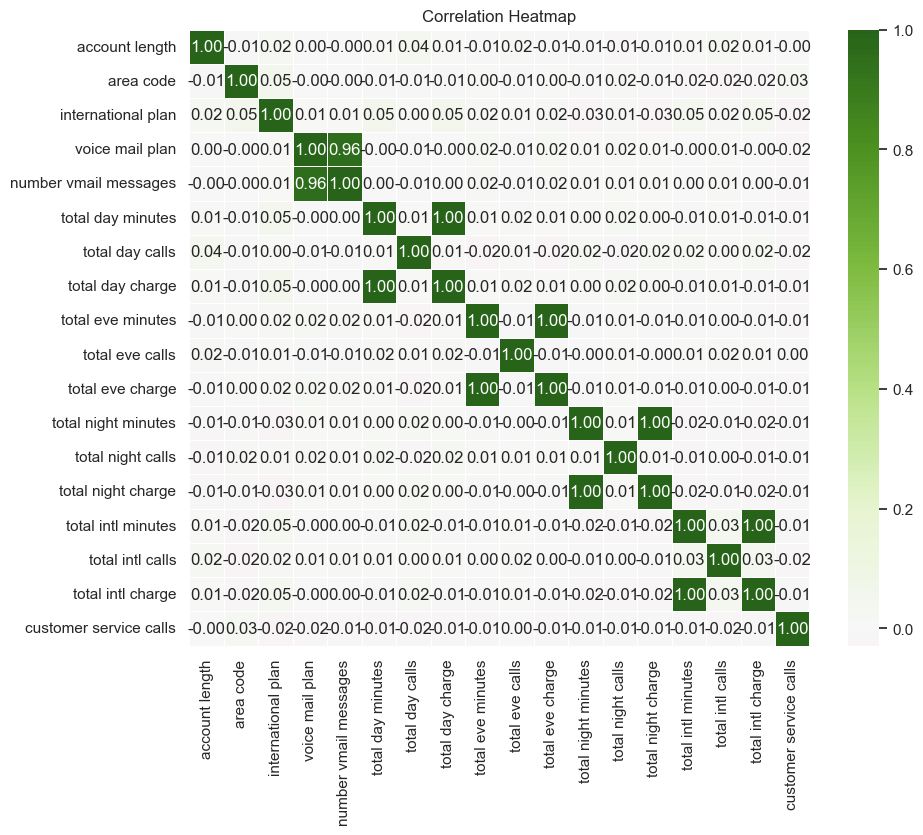

In [67]:
#Plotting a heatmap to show the correlation of the dataset features
def plot_correlation_heatmap(df):
    # Filtering for numerical columns only
    numerical_df = df.select_dtypes(include=['number'])
    
    # Calculating the correlation matrix
    correlation_matrix = numerical_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG', center=0, linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_correlation_heatmap(df_cleaned)

The heatmap indicates a high correlation between some features like: 1. Total Day Minutes and Total Day Charge 2. Total Night Minutes and Total Night Calls 3. Total Day Minutes and Total Day Calls.  There is little correlation between customer service calls and other usage metrics. This could imply that the number of service calls does not significantly relate to the amount of service used. Another observation I made from the heatmap is that no single numeric feature strongly predicts churn on its own 

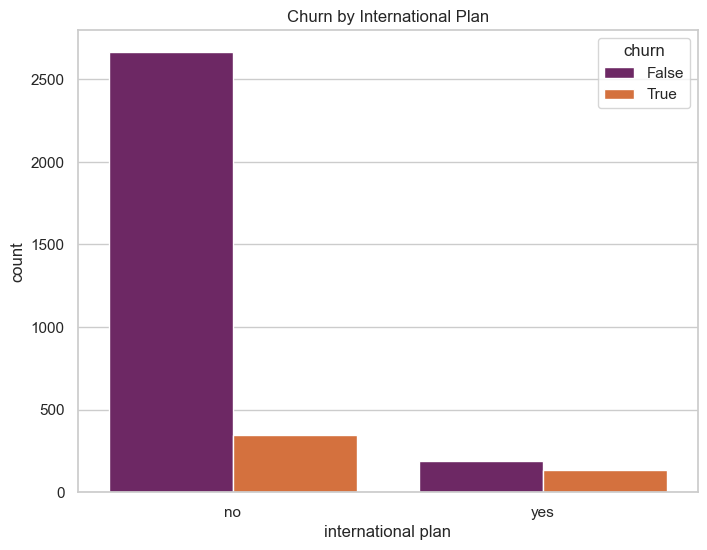

In [62]:
#Plotting barchart to check the count of churn
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='inferno')
plt.title('Churn by International Plan')
plt.show()


The count of churned customers is much higher among those without an international plan compared to those with one. This indicates a potential area for investigation regarding customer satisfaction or service offerings related to international plans.

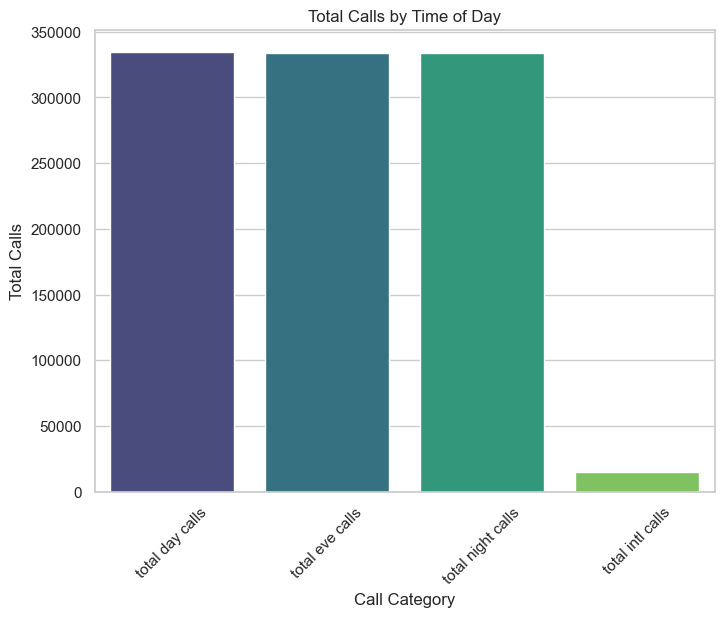

In [64]:
# Visualizing what times do people mostly use the services
call_categories = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']

# Aggregating the total calls for each category
call_totals = df[call_categories].sum()

# Creating a bar plot to visualize the findings
plt.figure(figsize=(8, 6))
sns.barplot(x=call_totals.index, y=call_totals.values, palette="viridis")
plt.title("Total Calls by Time of Day")
plt.xlabel("Call Category")
plt.ylabel("Total Calls")
plt.xticks(rotation=45)
plt.show()


The bar chart shows that the number of calls made during the day, evening, and night are very similar, with total day calls having a slightly higher count compared to evening and night calls.The number of international calls is significantly lower compared to calls made during other times. They should try to introduce cost-effective international calling plans, this could attract users who currently avoid international calls due to high costs.

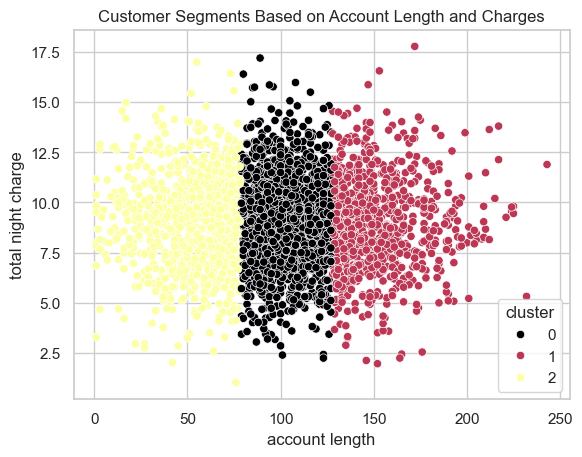

In [69]:
from sklearn.cluster import KMeans
import seaborn as sns

# Select features for clustering
features = df[['account length', 'total night charge', 'total day charge']]

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Scatter plot by clusters
sns.scatterplot(data=df, x='account length', y='total night charge', hue='cluster', palette='inferno')
plt.title('Customer Segments Based on Account Length and Charges')
plt.show()

Cluster 0 represents customers with medium account lengths and varying total night charges. 
Cluster 1 includes customers with longer account lengths and varying total night charges. 
Cluster 2 represents shorter account lengths and a broad range of total night charges.
High total night charges seem to span across all clusters, suggesting it might not be a primary differentiator alone.

## DATA MODELING

I will be creating Machine learning models that will help SyriaTel, a telecommunications company to be able to predict whether a customer will ("soon") stop doing business with this company and also reduce how much money is lost because of customers who don't stick around very long.

### LOGISTIC REGRESSION

In [23]:
#Scaling to normalize the range of features in my dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_features = ['account length', 'area code', 'total day minutes', 'total night charge', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes'
                     , 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls']

#Apply scaling using the Standard Scaling method
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df_scaled[numerical_features].describe())

       account length     area code  total day minutes  total night charge  \
count    3.333000e+03  3.333000e+03       3.333000e+03        3.333000e+03   
mean     1.470971e-16  4.221046e-16       7.312216e-16       -4.370275e-17   
std      1.000150e+00  1.000150e+00       1.000150e+00        1.000150e+00   
min     -2.513172e+00 -6.888343e-01      -3.301096e+00       -3.515366e+00   
25%     -6.797448e-01 -6.888343e-01      -6.624241e-01       -6.676792e-01   
50%     -1.627644e-03 -5.236033e-01      -6.887677e-03        4.691242e-03   
75%      6.513740e-01  1.718817e+00       6.725198e-01        6.814562e-01   
max      3.564766e+00  1.718817e+00       3.140422e+00        3.836763e+00   

       total day calls  total day charge  total eve minutes  total eve calls  \
count     3.333000e+03      3.333000e+03       3.333000e+03     3.333000e+03   
mean     -1.934646e-16     -2.835349e-16      -6.821892e-17     3.288365e-16   
std       1.000150e+00      1.000150e+00       1.000150e+

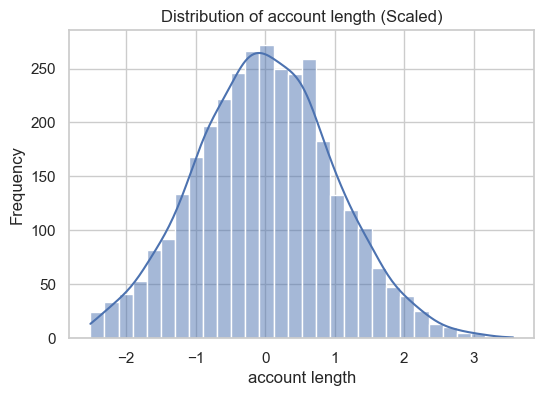

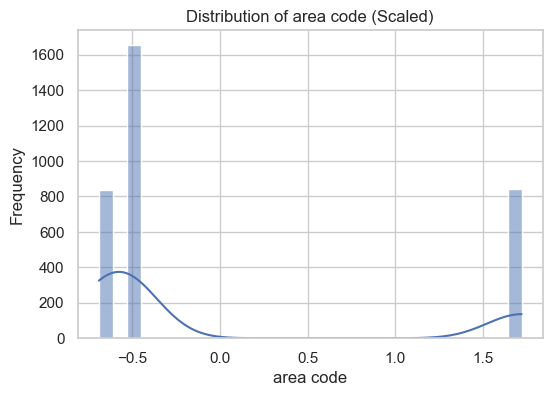

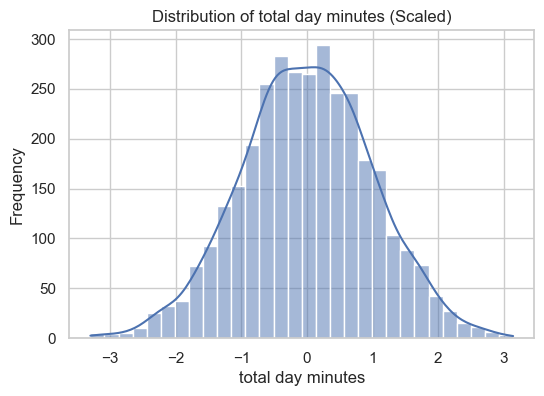

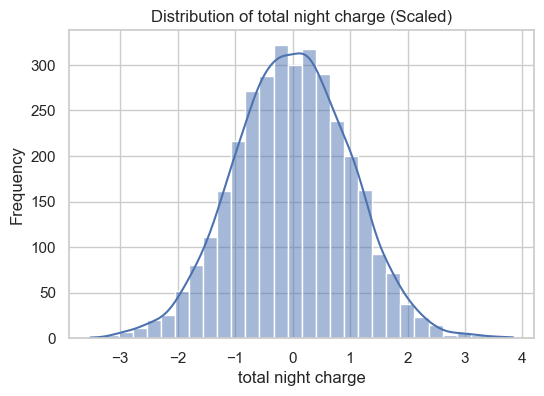

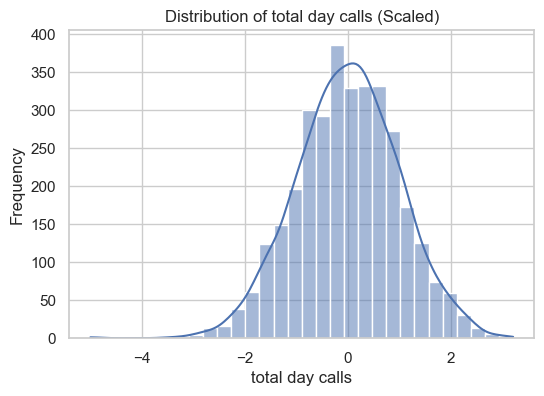

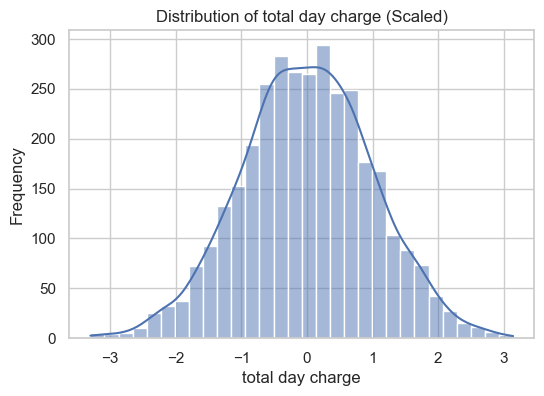

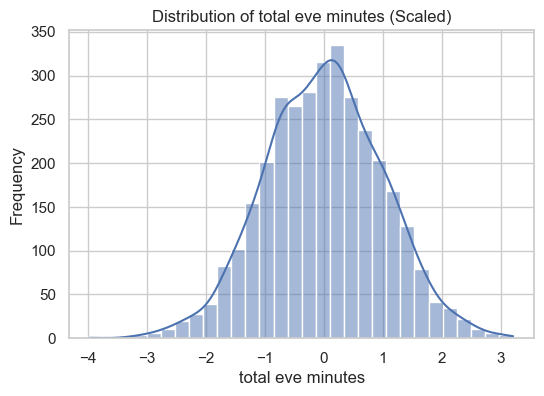

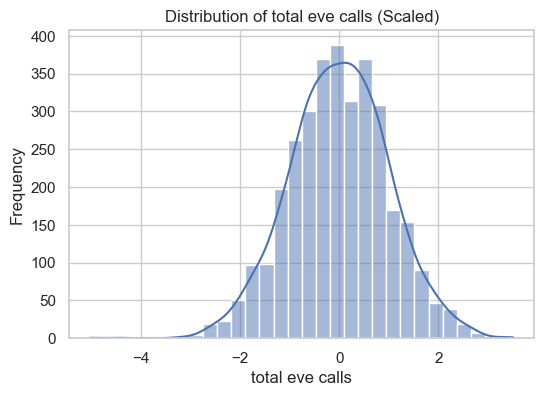

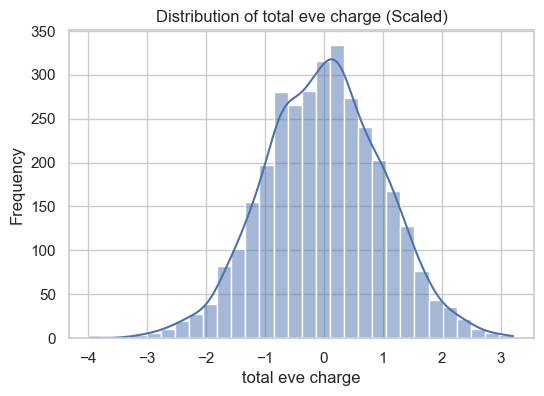

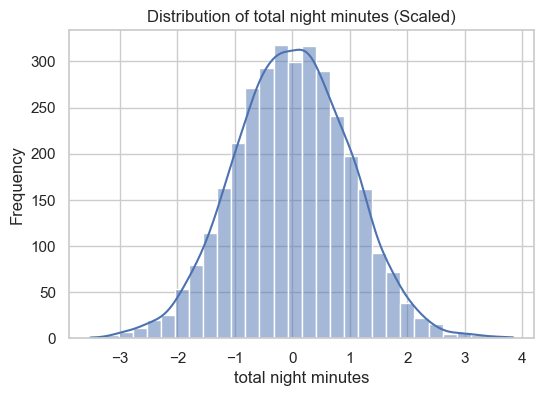

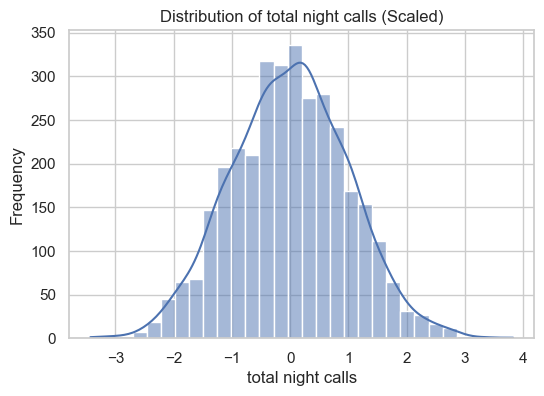

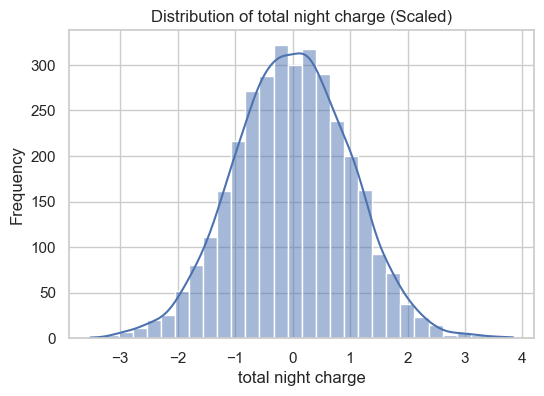

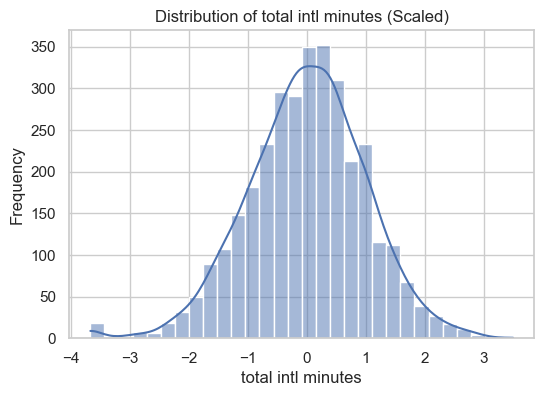

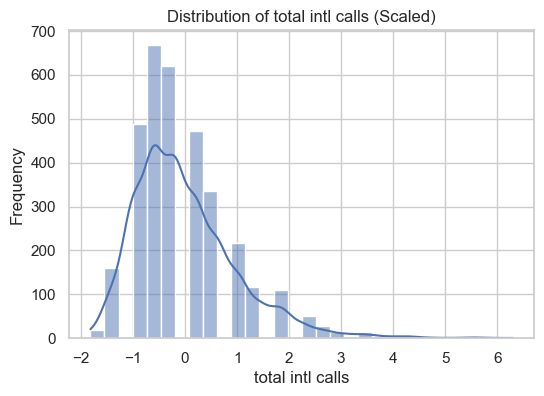

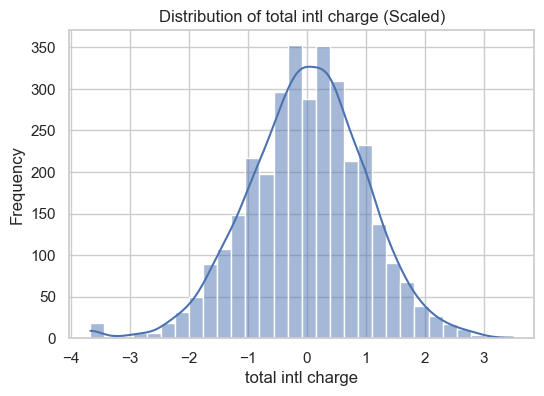

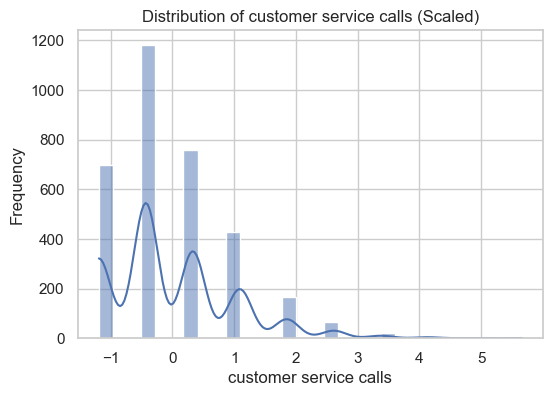

In [76]:
# Plotting histograms for each of my scaled numerical feature
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Selecting the columns I want to use as my x
selected_features = [
    'customer service calls', 'international plan', 'voice mail plan',
    'total day minutes', 'total intl minutes',
    'total eve minutes', 'total night minutes'
]
X = df_scaled[selected_features]  
y = df_scaled['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Dealing with the class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Training the Logistic Regression model with the resampled data
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


LogisticRegression(class_weight='balanced', random_state=42)

In [27]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC score of the model
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.7691154422788605
              precision    recall  f1-score   support

       False       0.95      0.77      0.85       566
        True       0.37      0.77      0.50       101

    accuracy                           0.77       667
   macro avg       0.66      0.77      0.68       667
weighted avg       0.86      0.77      0.80       667

ROC AUC: 0.8270475457439738


1. The model's accuracy is 0.769 (76.9%), which means it will correctly predict whether a customer will churn or not. A ROC AUC of 0.8159045586537451 indicates a fairly good ability to distinguish between churn and non-churn customers.
2. With a recall of 0.77 on the true indicates that 77% of actual churners were identified by the model. This model identifies the most at-risk customers, allowing the company to intervene and potentially prevent churn.
3. For precision Only 37% of actual churners were identified by the model. This could lead to unnecessary retention efforts.

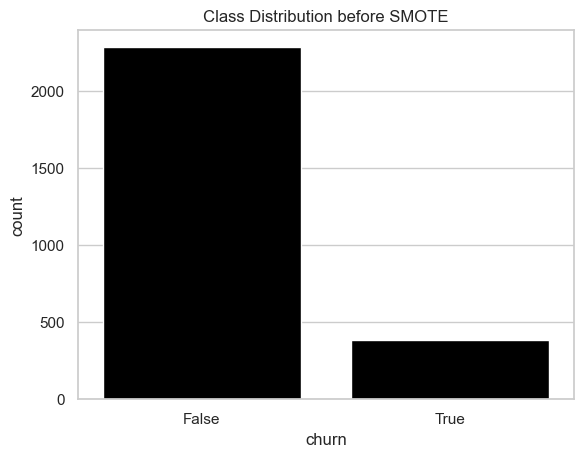

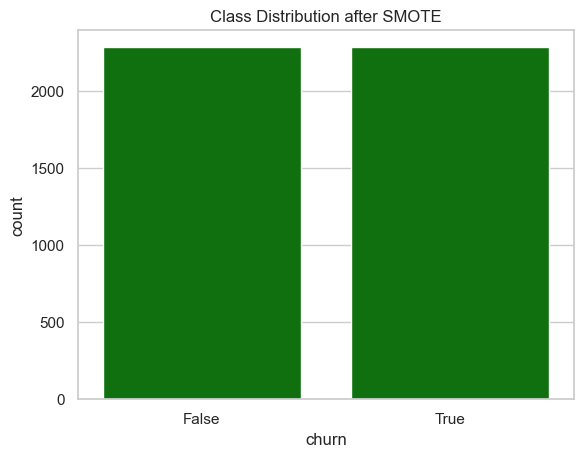

In [28]:
#Plotting the distribution of the target class before and after applying SMOTE to see if the class imbalance has been dealt with
# Before applying SMOTE
sns.countplot(x=y_train, color='black')
plt.title("Class Distribution before SMOTE")
plt.show()

# After applying SMOTE
sns.countplot(x=y_train_resampled, color='green')
plt.title("Class Distribution after SMOTE")
plt.show()

These visualizations indicate that the classes were able to balance after applying the SMOTE technique

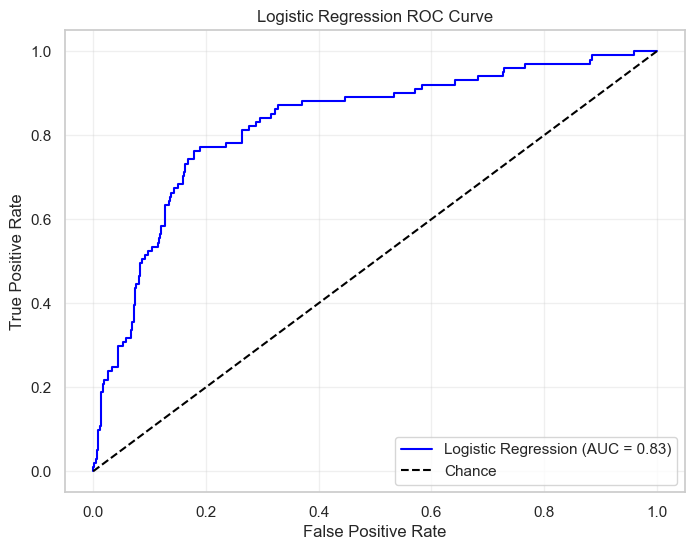

In [56]:
from sklearn.metrics import roc_curve, auc

# Computing the FPR, TPR, and AUC for Logistic Regression
model_fpr, model_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
model_auc = auc(model_fpr, model_tpr)

plt.figure(figsize=(8, 6))
plt.plot(model_fpr, model_tpr, label=f'Logistic Regression (AUC = {model_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Chance', color='black')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

An AUC of 0.83 indicates the model is 83% likely to distinguish between a positive case (True class) and a negative case (False class). The curve is well above the diagonal "chance" line (dotted), showing the model performs significantly better than random guessing.
The steep initial rise suggests the model achieves a high true positive rate (sensitivity) with a low false positive rate.

### DECISION TREES

In [30]:
#Import  Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [31]:
#Selecting the columns I want to use as my x
selected_features = [
    'customer service calls', 'international plan', 'voice mail plan',
    'total day minutes', 'total intl minutes',
    'total eve minutes', 'total night minutes'
]

# Splitting data based on selected features
X = df_scaled[selected_features]  
y = df_scaled['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluating the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9145427286356822
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       566
        True       0.74      0.67      0.70       101

    accuracy                           0.91       667
   macro avg       0.84      0.82      0.83       667
weighted avg       0.91      0.91      0.91       667

ROC AUC: 0.8154322499387748


1. The Decision tree accuracy is  0.914(91%), which is higher than the Logistic Regression (0.76), indicating that the Decision Tree handles the data and patterns well. Also, the ROC AUC of  0.815(81%). This shows good model performance, especially in differentiating between the churn and no-churn classes. It suggests the Decision Tree captures the underlying patterns better than the Logistic Regression.
2. The precision(True class) is at 0.74 indicating that the model correctly identified 74% of churners. And a Recall (True class) of 0.67 shows that the model correctly identified 67% of churners.
3. This model has a high recall of churners meaning it identifies a greater proportion of potential churners and this could be helpful if the company wants to target more customers who are likely to churn.

In [32]:
#Hyperparameter Tuning using GridSearchCV to find the optimal hyperparameters for the Decision Tree
# Defining the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initializing the GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid, cv=5, scoring='roc_auc')

# Training the model with GridSearch
grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [33]:
# Using the best estimator
best_dt_model = grid_search_dt.best_estimator_

# Predicting on the test set
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print(classification_report(y_test, y_pred_best_dt))
print("ROC AUC:", roc_auc_score(y_test, best_dt_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9175412293853074
              precision    recall  f1-score   support

       False       0.93      0.98      0.95       566
        True       0.83      0.57      0.68       101

    accuracy                           0.92       667
   macro avg       0.88      0.78      0.82       667
weighted avg       0.91      0.92      0.91       667

ROC AUC: 0.8889637196935241


1. After hyperparameter tuning the accuracy has increased from 0.9145427286356822 to 0.9175412293853074 and the ROC AUC has increased from 0.8154322499387748 to 0.8889637196935241. This indicates better overall performance in classifying both churn and non-churn cases.
2. The Precision (Churn - True) also improved from 0.74 to 0.83 meaning fewer false positives, suggesting the model is more confident when predicting churn cases. But the Recall (Churn - True) dropped from 0.67 to 0.57 indicating a slight increase in false negatives—some actual churn cases might be missed.
3. After hyperparameter tuning it seems to prioritize precision (83%) at the expense of recall. It’s better at minimizing false positives, meaning it’s more certain about churn predictions. This will be beneficial if the company wants to avoid wasting resources on customers who won't churn.

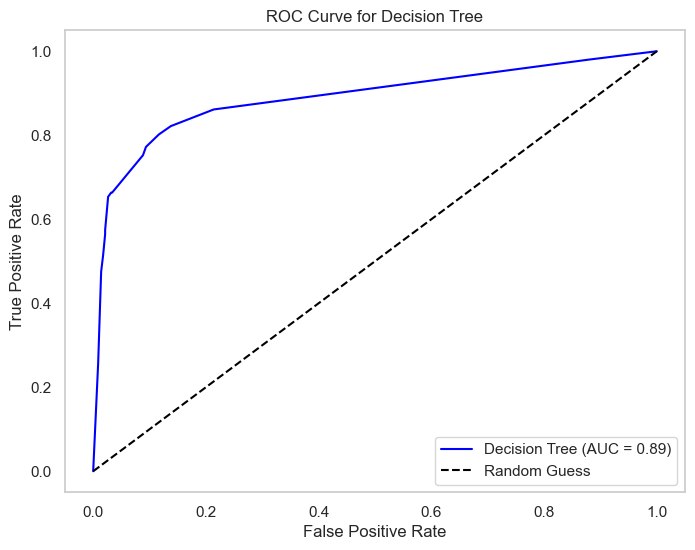

In [55]:
from sklearn.metrics import roc_curve, auc

# Getting the probabilities for the positive class
dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Calculating the FPR, TPR, and AUC
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
dt_auc = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='blue', label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label="Random Guess")
plt.title("ROC Curve for Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The Decision Tree model achieves an AUC of 0.89, which reflects a strong ability to distinguish between the positive (churn) and negative (non-churn) classes. The curve is well above the diagonal line of random guessing, confirming the model's effectiveness. The steep initial ascent indicates the model achieves high sensitivity (true positive rate) at low false positive rates.

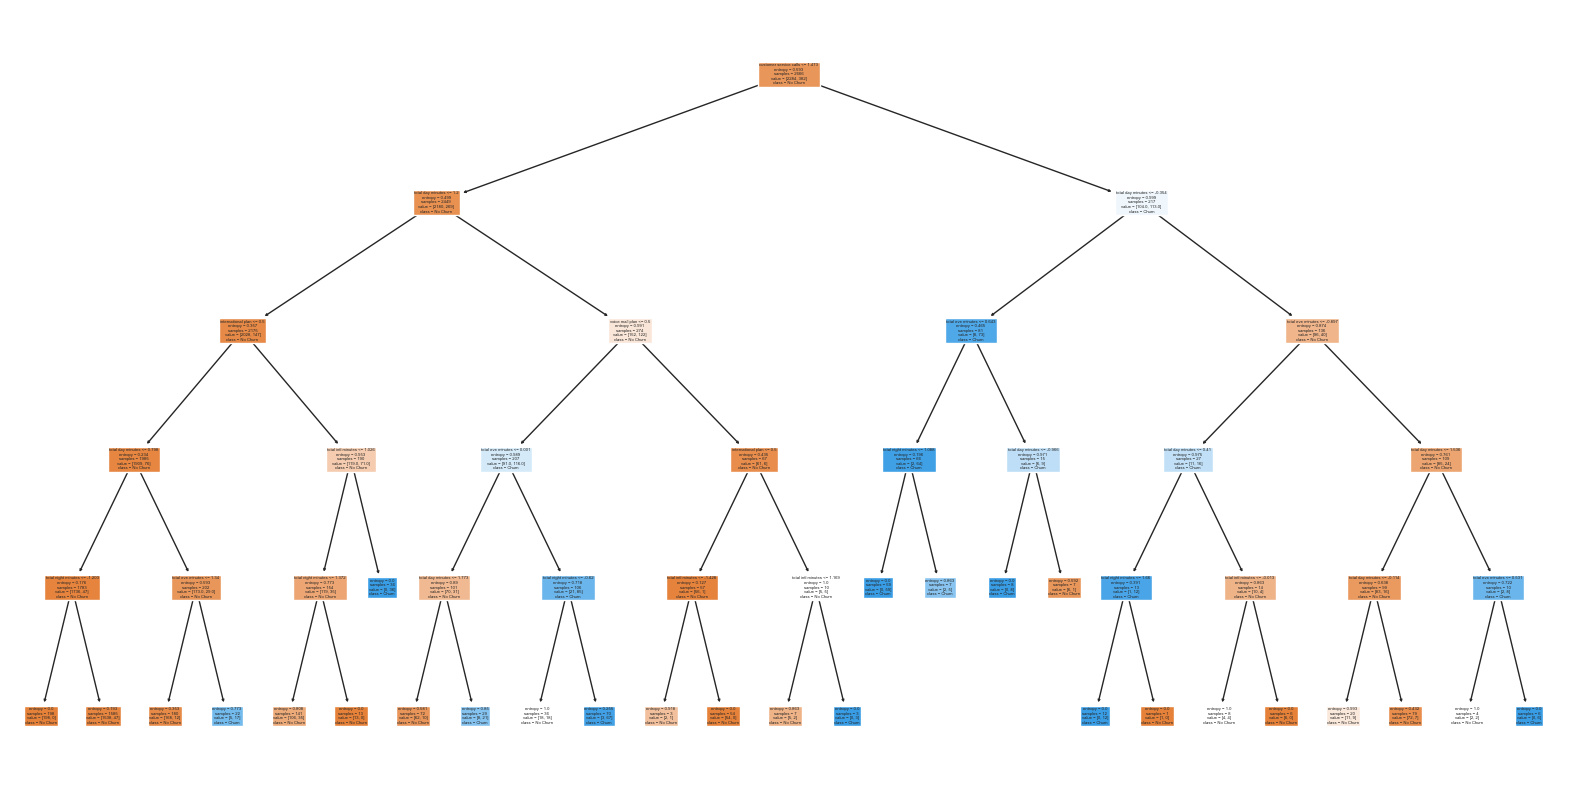

In [35]:
#Plotting the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

### RANDOM FOREST

In [42]:
#Importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#Selecting the specific columns I want to use
selected_features = [
    'customer service calls', 'international plan', 'voice mail plan',
    'total day minutes', 'total intl minutes',
    'total eve minutes', 'total night minutes'
]

# Splitting the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Evaluating the model
print("Training Accuracy:", accuracy_score(y_train, rf_train_preds))
print("Test Accuracy:", accuracy_score(y_test, rf_test_preds))
print("Classification Report on Test Data:")
print(classification_report(y_test, rf_test_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_test_preds))


Training Accuracy: 1.0
Test Accuracy: 0.9400299850074962
Classification Report on Test Data:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.92      0.66      0.77       101

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

ROC AUC: 0.8263828149599413


1. The Training Accuracy: 1.0 indicates that it has perfectly fitted the training data but the test accuracy of 0.9400299850074962 (94%) suggests the model generalizes well. While the ROC AUC(0.8263828149599413) is not as high as test accuracy, this score shows the model distinguishes between churners and non-churners reasonably well.
2. With a precision of 0.94 and recall of 0.99 on false class, the model is highly effective at correctly identifying customers who will not churn, minimizing false positives. In true class the precision is 0.92, meaning most identified churners are correctly classified. However, the recall of 0.66 indicates the model misses about 34% of actual churners.
3. The Random Forest model is well-suited for identifying churners early and it will help target retention strategies by flagging likely churners for proactive intervention.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Creating a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluating the best model
y_pred_rf = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9265367316341829
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       566
        True       0.79      0.70      0.74       101

    accuracy                           0.93       667
   macro avg       0.87      0.83      0.85       667
weighted avg       0.92      0.93      0.92       667

ROC AUC: 0.9118007207081132


1. The model has an accuracy of 0.9265367316341829 and an ROC AUC of 0.9118007207081132 which shows the model is highly effective at distinguishing between churners and non-churners across all classification thresholds, which is critical for customer retention strategies.
2. Precision (0.95) and recall (0.97) for false class indicate the model is excellent at identifying customers who will not churn. This minimizes unnecessary retention efforts for customers unlikely to leave.
3. For the true class the precision (0.79) shows that when the model predicts a customer will churn, it is correct about 79% of the time. And a recall (0.70) shows that the model captures 70% of actual churners. This indicates the model can identify most churners, providing actionable insights.
4. This will help SyriaTel Communications to be able to  address the concerns of customers who are likely to churn soon.


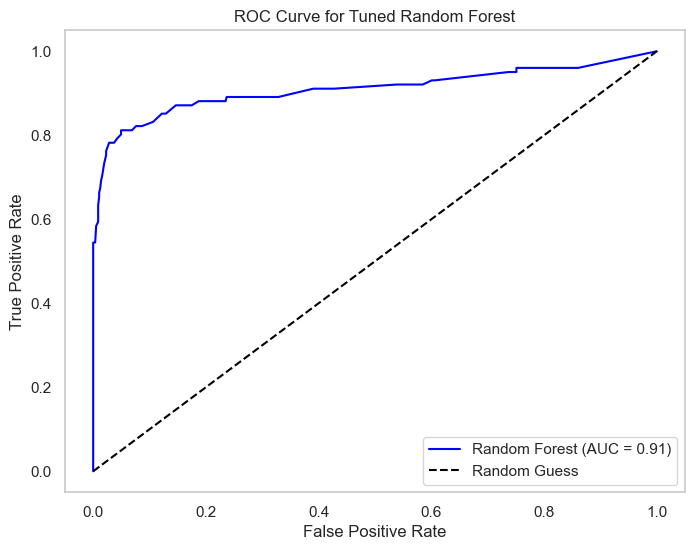

In [58]:
from sklearn.metrics import roc_curve, auc

# Getting the probabilities for the positive class
rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculating FPR, TPR, and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label="Random Guess")
plt.title("ROC Curve for Tuned Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The model has a relatively high area under the curve (AUC) score of 0.91, which indicates a good ability to discriminate between the two classes of whether a customer will churn or not. The curve shows a steep rise in the True Positive Rate as the False Positive Rate increases, which suggests that the model is effectively identifying customers who are likely to churn (True Positives) without too many False Positives. This is a good sign that the model is capturing meaningful patterns in the data. This performance suggests the model can reliably help SyriaTel identify customers who are at risk of churn, aiding in targeted retention strategies.

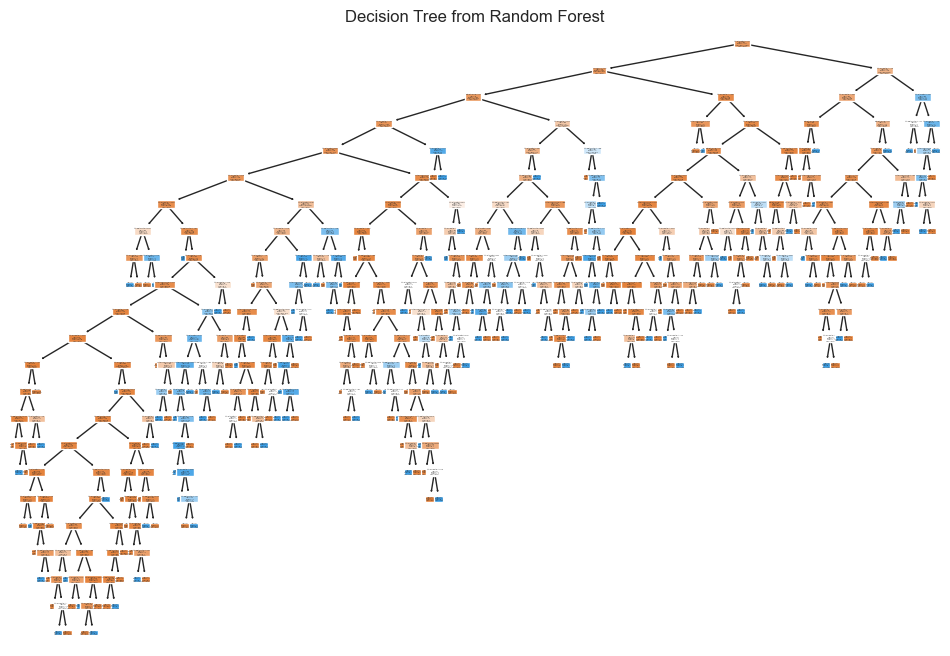

In [39]:
# Visualizing the first tree in the Random Forest
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['False', 'True'])
plt.title('Decision Tree from Random Forest')
plt.show()


### EVALUATION

-From the modeling I did of Logistic Regression, Decision Trees, and Random Forest classificationn, I will rank them based on their succes metricss .Starting with Random Forest which had the highest success rate compared to all then next was Decision trees whose success rate was lower than that ofthe Random Forest but higher than for Logistic Regression. The model with the lowest success rate was the Logistic Regression model.
-The success rate was determined by several factors like accuracy, precision, recall and ROC-AUC. From all these determiners the Random Forest classification proved to have a high success rate. 


### CONCLUSIONS

1. The Random Forest classification model was better at distinguishing between churners and non-churners across all classification thresholds, which is critical for customer retention strategies.
2. The hyperparameter tuning helped to enable the model to be better distinguish between churners and non-churners across all classification thresholds, which is critical for customer retention strategies.
3. Random Forest models outperform both Logistic Regression and Decision Trees in capturing complex patterns in the data and better modeling of the data.42 .The high accuracy and recall values of the Random Forest with hyperparameter tuning modeldemonstrates its reliability in predicting customer churn.5
at Customers with international plans and high total charges are at higher risk of churn.



### RECOMMENDATIONS

1.I would recommend the company to focus on customers with high total charges and international plans.
2.I would recommend the company to use the tuned Random Forest model to be able to flag high-risk customers for retention efforts.
3.Based on churn insights, consider revisiting pricing structures or enhancing international plan features to better align with customer needs.
4.Introduce loyalty programs targeting high-usage customers to improve retention rates.
5.Regularly retrain the model using updated customer data to ensure its predictions remain accurate as customer behaviors evolve.
